In [19]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from matplotlib import pyplot as plt

## 7.1

**Simulate a single predictor and a nonlinear relationship, such as a sin wave shown in Fig. 7.7, and investigate the relationship between the cost, \epsilon, and kernel parameters for a support vector machine model**

In [15]:
np.random.seed(seed=12345)
x = [i/100 for i in range(200, 1000, 8)]

In [13]:
df = pd.DataFrame(x, columns=["x"])

In [22]:
df["y"] = np.sin(df["x"])
df["y"] = df["y"] + np.random.normal(0, 0.25, 100)

[]

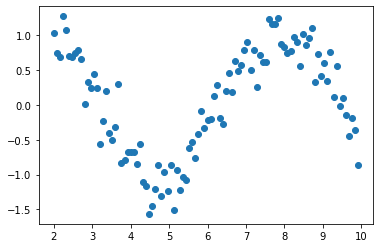

In [23]:
plt.scatter(x=df["x"], y=df["y"])
plt.plot()

In [24]:
cost=1
epsilon=0.1
rbfSVM = SVR(kernel="rbf", C=cost, epsilon=epsilon)

In [27]:
rbfSVM.fit(X=df[["x"]], y=df["y"])

SVR(C=1)

[]

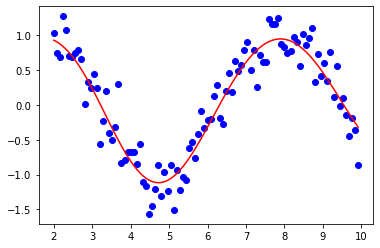

In [40]:
plt.plot(df["x"], rbfSVM.predict(df[["x"]]), color="r")
plt.scatter(x=df["x"], y=df["y"], color="b")
plt.plot()

In [32]:
df["x"]

0     2.00
1     2.08
2     2.16
3     2.24
4     2.32
      ... 
95    9.60
96    9.68
97    9.76
98    9.84
99    9.92
Name: x, Length: 100, dtype: float64